# Import Necessary Packages

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "4"

import torch
import torch.nn as nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.utils import save_image 

from itertools import product # draw 10 * 10 images
from tqdm import tqdm

import matplotlib.pyplot as plt
# Enable Jupyter notebook plotting
%matplotlib inline

# Pytorch Version
print(torch.__version__)
print(torch.cuda.is_available())

1.7.0
True


# Hyper Parameters

In [2]:
batch_size = 128
num_epoch = 100

lr = 1e-3 # leanring rate of Encoder and Decoder

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


# Datasets files & utils

In [3]:
# the path we save data
if not os.path.exists('../../img'):
    os.mkdir('../../img')

# Transform of our datasets
trans = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean = (0.5), std = (0.5))
])
    
# MNIST datasets downloading……
mnist = datasets.MNIST(
    root = '../../data/mnist/', train = True, transform = trans, download = True
)

# Dataloader
dataloader = torch.utils.data.DataLoader(
    dataset = mnist, batch_size = batch_size, shuffle = True
)

In [4]:
def to_gray_img(x):
    out = 0.5*(x+1)
    out = out.clamp(0,1) # force therandom distribution of x into [min, max]
    out = out.view(-1, 1, 28, 28) # view a multi-row Tensor as one row
    return out

# Model Definitions
## Encoder
Input of Encoder is an image, output is encoded
    vector representation of that image.

In [5]:
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        self.En = nn.Sequential(
            nn.Linear(784, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 8),
        )
    
    def forward(self, x):
        x = self.En(x)
        return x

## Decoder
Input is an encoded vector representation, output is reconstructed image.

In [6]:
class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        self.De = nn.Sequential(
            nn.Linear(8, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 784),
        )
    
    def forward(self, x):
        x = self.De(x)
        return x

## AutoEncoder
 Autoencoder super class to encode then decode an image

In [7]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        # self.__dict__.update(locals())
        self.encoder = Encoder()
        self.decoder = Decoder()
    
    def forward(self, x):
        return self.decoder(self.encoder(x))

#  Traning Phase
## Model & Opitmizer

In [8]:
AE = Autoencoder()
AE = AE.to(device)

In [9]:

optimizer = torch.optim.Adam(params = [p for p in AE.parameters()
                                      if p.requires_grad],
                             lr = lr
                            )

## Trainning Start!

  0%|          | 0/100 [00:00<?, ?it/s]

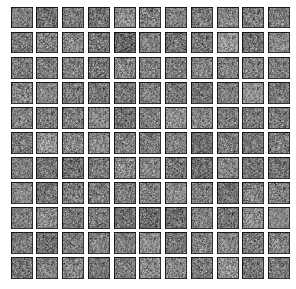

Epoch[0/100],recon_loss:13897.297852


  1%|          | 1/100 [01:11<1:57:12, 71.03s/it]

Epoch[1/100],recon_loss:11116.623047


  2%|▏         | 2/100 [01:49<1:40:09, 61.32s/it]

Epoch[2/100],recon_loss:10895.437500


  3%|▎         | 3/100 [02:32<1:30:21, 55.89s/it]

Epoch[3/100],recon_loss:10468.000000


  4%|▍         | 4/100 [03:12<1:21:42, 51.07s/it]

Epoch[4/100],recon_loss:9934.031250


  5%|▌         | 5/100 [03:51<1:15:04, 47.42s/it]

Epoch[5/100],recon_loss:9712.634766


  6%|▌         | 6/100 [04:27<1:08:50, 43.94s/it]

Epoch[6/100],recon_loss:9702.085938


  7%|▋         | 7/100 [05:11<1:07:59, 43.87s/it]

Epoch[7/100],recon_loss:9821.791016


  8%|▊         | 8/100 [05:51<1:05:31, 42.73s/it]

Epoch[8/100],recon_loss:9685.375000


  9%|▉         | 9/100 [06:32<1:04:16, 42.38s/it]

Epoch[9/100],recon_loss:8826.769531


 10%|█         | 10/100 [07:11<1:02:07, 41.42s/it]

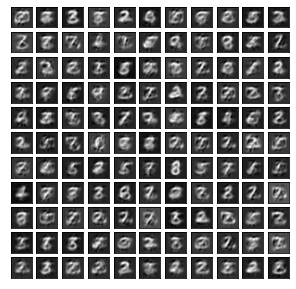

Epoch[10/100],recon_loss:9269.369141


 11%|█         | 11/100 [08:05<1:07:02, 45.20s/it]

Epoch[11/100],recon_loss:9291.019531


 12%|█▏        | 12/100 [08:48<1:05:12, 44.46s/it]

Epoch[12/100],recon_loss:9488.107422


 13%|█▎        | 13/100 [09:30<1:03:05, 43.52s/it]

Epoch[13/100],recon_loss:9005.419922


 14%|█▍        | 14/100 [10:17<1:04:15, 44.83s/it]

Epoch[14/100],recon_loss:8972.941406


 15%|█▌        | 15/100 [10:57<1:01:12, 43.20s/it]

Epoch[15/100],recon_loss:9246.277344


 16%|█▌        | 16/100 [11:40<1:00:23, 43.14s/it]

Epoch[16/100],recon_loss:8400.394531


 17%|█▋        | 17/100 [12:25<1:00:22, 43.64s/it]

Epoch[17/100],recon_loss:8442.658203


 18%|█▊        | 18/100 [13:04<57:43, 42.23s/it]  

Epoch[18/100],recon_loss:8689.134766


 19%|█▉        | 19/100 [13:46<57:06, 42.30s/it]

Epoch[19/100],recon_loss:8670.308594


 20%|██        | 20/100 [14:29<56:44, 42.56s/it]

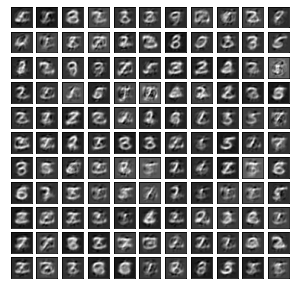

Epoch[20/100],recon_loss:8669.542969


 21%|██        | 21/100 [15:28<1:02:38, 47.57s/it]

Epoch[21/100],recon_loss:8951.484375


 22%|██▏       | 22/100 [16:09<59:14, 45.57s/it]  

Epoch[22/100],recon_loss:8992.077148


 23%|██▎       | 23/100 [16:52<57:25, 44.74s/it]

Epoch[23/100],recon_loss:8559.894531


 24%|██▍       | 24/100 [17:33<55:03, 43.47s/it]

Epoch[24/100],recon_loss:9169.710938


 25%|██▌       | 25/100 [18:18<55:11, 44.15s/it]

Epoch[25/100],recon_loss:8229.760742


 26%|██▌       | 26/100 [18:59<53:14, 43.17s/it]

Epoch[26/100],recon_loss:8894.687500


 27%|██▋       | 27/100 [19:51<55:47, 45.85s/it]

Epoch[27/100],recon_loss:8466.139648


 28%|██▊       | 28/100 [20:26<50:55, 42.44s/it]

Epoch[28/100],recon_loss:8199.388672


 29%|██▉       | 29/100 [21:13<51:44, 43.73s/it]

Epoch[29/100],recon_loss:8956.738281


 30%|███       | 30/100 [21:51<49:09, 42.14s/it]

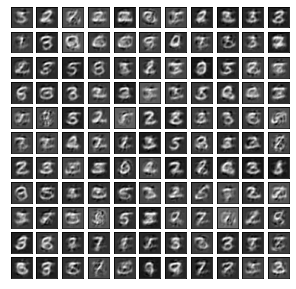

Epoch[30/100],recon_loss:8714.965820


 31%|███       | 31/100 [22:55<56:03, 48.75s/it]

Epoch[31/100],recon_loss:8549.356445


 32%|███▏      | 32/100 [23:38<53:20, 47.06s/it]

Epoch[32/100],recon_loss:9094.212891


 33%|███▎      | 33/100 [24:19<50:33, 45.28s/it]

Epoch[33/100],recon_loss:8601.844727


 34%|███▍      | 34/100 [25:04<49:29, 44.99s/it]

Epoch[34/100],recon_loss:8693.537109


 35%|███▌      | 35/100 [25:48<48:32, 44.81s/it]

Epoch[35/100],recon_loss:8011.132324


 36%|███▌      | 36/100 [26:31<47:16, 44.33s/it]

Epoch[36/100],recon_loss:8177.844238


 37%|███▋      | 37/100 [27:15<46:22, 44.16s/it]

Epoch[37/100],recon_loss:9102.689453


 38%|███▊      | 38/100 [27:47<41:46, 40.43s/it]

Epoch[38/100],recon_loss:8044.724121


 39%|███▉      | 39/100 [28:34<43:07, 42.42s/it]

Epoch[39/100],recon_loss:8261.820312


 40%|████      | 40/100 [29:07<39:27, 39.46s/it]

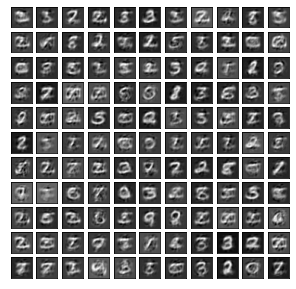

Epoch[40/100],recon_loss:8644.151367


 41%|████      | 41/100 [30:10<45:51, 46.64s/it]

Epoch[41/100],recon_loss:8746.699219


 42%|████▏     | 42/100 [30:45<41:36, 43.03s/it]

Epoch[42/100],recon_loss:7578.408691


 43%|████▎     | 43/100 [31:34<42:43, 44.97s/it]

Epoch[43/100],recon_loss:8438.872070


 44%|████▍     | 44/100 [32:08<38:55, 41.70s/it]

Epoch[44/100],recon_loss:8464.727539


 45%|████▌     | 45/100 [32:58<40:30, 44.19s/it]

Epoch[45/100],recon_loss:7843.701172


 46%|████▌     | 46/100 [33:35<37:55, 42.14s/it]

Epoch[46/100],recon_loss:8075.566895


 47%|████▋     | 47/100 [34:32<40:55, 46.33s/it]

Epoch[47/100],recon_loss:7873.108398


 48%|████▊     | 48/100 [35:07<37:26, 43.20s/it]

Epoch[48/100],recon_loss:7655.574219


 49%|████▉     | 49/100 [36:02<39:33, 46.53s/it]

Epoch[49/100],recon_loss:8370.658203


 50%|█████     | 50/100 [36:45<38:03, 45.67s/it]

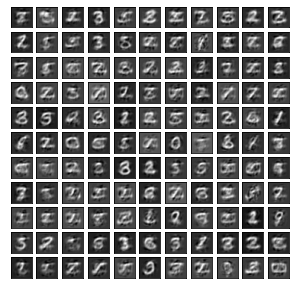

Epoch[50/100],recon_loss:8505.496094


 51%|█████     | 51/100 [37:51<42:12, 51.68s/it]

Epoch[51/100],recon_loss:7599.374512


 52%|█████▏    | 52/100 [38:34<39:12, 49.01s/it]

Epoch[52/100],recon_loss:8113.336914


 53%|█████▎    | 53/100 [39:22<38:07, 48.66s/it]

Epoch[53/100],recon_loss:8101.050293


 54%|█████▍    | 54/100 [40:11<37:28, 48.88s/it]

Epoch[54/100],recon_loss:8590.099609


 55%|█████▌    | 55/100 [40:53<35:10, 46.89s/it]

Epoch[55/100],recon_loss:7976.456055


 56%|█████▌    | 56/100 [41:40<34:14, 46.70s/it]

Epoch[56/100],recon_loss:7822.204590


 57%|█████▋    | 57/100 [42:19<31:54, 44.53s/it]

Epoch[57/100],recon_loss:7503.522461


 58%|█████▊    | 58/100 [43:08<32:06, 45.87s/it]

Epoch[58/100],recon_loss:7544.127930


 59%|█████▉    | 59/100 [43:51<30:39, 44.86s/it]

Epoch[59/100],recon_loss:7627.354980


 60%|██████    | 60/100 [44:41<31:02, 46.55s/it]

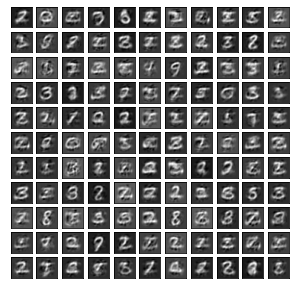

Epoch[60/100],recon_loss:8712.532227


 61%|██████    | 61/100 [45:48<34:10, 52.58s/it]

Epoch[61/100],recon_loss:7996.971680


 62%|██████▏   | 62/100 [46:32<31:44, 50.11s/it]

Epoch[62/100],recon_loss:8653.385742


 63%|██████▎   | 63/100 [47:21<30:41, 49.77s/it]

Epoch[63/100],recon_loss:8275.619141


 64%|██████▍   | 64/100 [48:04<28:38, 47.73s/it]

Epoch[64/100],recon_loss:7775.401367


 65%|██████▌   | 65/100 [48:52<27:54, 47.84s/it]

Epoch[65/100],recon_loss:7577.379883


 66%|██████▌   | 66/100 [49:31<25:33, 45.10s/it]

Epoch[66/100],recon_loss:8467.734375


 67%|██████▋   | 67/100 [50:15<24:42, 44.92s/it]

Epoch[67/100],recon_loss:7924.458008


 68%|██████▊   | 68/100 [50:57<23:30, 44.07s/it]

Epoch[68/100],recon_loss:8484.082031


 69%|██████▉   | 69/100 [51:33<21:27, 41.53s/it]

Epoch[69/100],recon_loss:7908.323242


 70%|███████   | 70/100 [52:20<21:37, 43.26s/it]

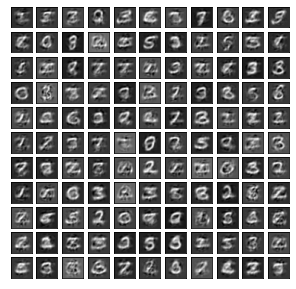

Epoch[70/100],recon_loss:7714.398438


 71%|███████   | 71/100 [53:17<22:48, 47.20s/it]

Epoch[71/100],recon_loss:7797.689453


 72%|███████▏  | 72/100 [53:57<21:07, 45.26s/it]

Epoch[72/100],recon_loss:7904.178711


 73%|███████▎  | 73/100 [54:44<20:33, 45.69s/it]

Epoch[73/100],recon_loss:8109.116211


 74%|███████▍  | 74/100 [55:28<19:36, 45.24s/it]

Epoch[74/100],recon_loss:7667.344727


 75%|███████▌  | 75/100 [56:06<17:50, 42.83s/it]

Epoch[75/100],recon_loss:7641.960449


 76%|███████▌  | 76/100 [56:50<17:17, 43.23s/it]

Epoch[76/100],recon_loss:7385.030273


 77%|███████▋  | 77/100 [57:25<15:39, 40.83s/it]

Epoch[77/100],recon_loss:7744.824219


 78%|███████▊  | 78/100 [58:11<15:35, 42.51s/it]

Epoch[78/100],recon_loss:7989.736328


 79%|███████▉  | 79/100 [58:46<14:03, 40.17s/it]

Epoch[79/100],recon_loss:8067.438477


 80%|████████  | 80/100 [59:32<13:55, 41.78s/it]

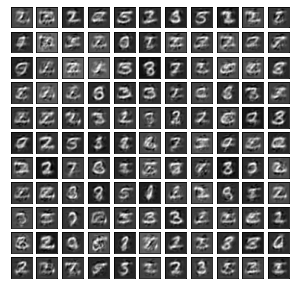

Epoch[80/100],recon_loss:7825.754395


 81%|████████  | 81/100 [1:00:31<14:51, 46.93s/it]

Epoch[81/100],recon_loss:7999.042969


 82%|████████▏ | 82/100 [1:01:20<14:17, 47.64s/it]

Epoch[82/100],recon_loss:7962.577148


 83%|████████▎ | 83/100 [1:02:03<13:07, 46.34s/it]

Epoch[83/100],recon_loss:8244.019531


 84%|████████▍ | 84/100 [1:02:42<11:44, 44.00s/it]

Epoch[84/100],recon_loss:8707.476562


 85%|████████▌ | 85/100 [1:03:28<11:12, 44.83s/it]

Epoch[85/100],recon_loss:7417.404297


 86%|████████▌ | 86/100 [1:04:06<09:56, 42.59s/it]

Epoch[86/100],recon_loss:7689.401367


 87%|████████▋ | 87/100 [1:04:56<09:41, 44.77s/it]

Epoch[87/100],recon_loss:7928.462402


 88%|████████▊ | 88/100 [1:05:34<08:33, 42.80s/it]

Epoch[88/100],recon_loss:8182.530273


 89%|████████▉ | 89/100 [1:06:23<08:12, 44.81s/it]

Epoch[89/100],recon_loss:7826.090820


 90%|█████████ | 90/100 [1:07:03<07:12, 43.27s/it]

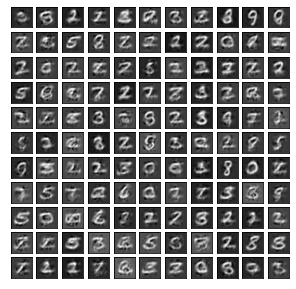

Epoch[90/100],recon_loss:7819.836914


 91%|█████████ | 91/100 [1:08:06<07:22, 49.13s/it]

Epoch[91/100],recon_loss:7625.236328


 92%|█████████▏| 92/100 [1:08:42<06:02, 45.26s/it]

Epoch[92/100],recon_loss:8033.133789


 93%|█████████▎| 93/100 [1:09:28<05:17, 45.34s/it]

Epoch[93/100],recon_loss:7738.433105


 94%|█████████▍| 94/100 [1:09:58<04:05, 40.95s/it]

Epoch[94/100],recon_loss:7884.040039


 95%|█████████▌| 95/100 [1:10:47<03:35, 43.17s/it]

Epoch[95/100],recon_loss:7970.722656


 96%|█████████▌| 96/100 [1:11:23<02:43, 40.97s/it]

Epoch[96/100],recon_loss:7804.319336


 97%|█████████▋| 97/100 [1:12:08<02:06, 42.24s/it]

Epoch[97/100],recon_loss:7634.384766


 98%|█████████▊| 98/100 [1:12:45<01:21, 40.74s/it]

Epoch[98/100],recon_loss:7865.535645


 99%|█████████▉| 99/100 [1:13:29<00:41, 41.67s/it]

Epoch[99/100],recon_loss:8243.462891


100%|██████████| 100/100 [1:14:13<00:00, 44.54s/it]


In [10]:
for epoch in tqdm(range(num_epoch)):
    AE.train()
    
    # epoch_loss = []
    # ========================= Sample and Visualization ====================
    if epoch % 10 == 0:
        AE.eval()
        # sample z
        z = torch.randn(batch_size, 8).to(device)

        # sample x (i.e. imgs)
        sample = AE.decoder(z)

        plt.close()
        grid_size, k = int(sample.shape[0] ** 0.5), 0 # 10 * 10
        fig, ax = plt.subplots(grid_size, grid_size, figsize=(5, 5))
        for i, j in product(range(grid_size), range(grid_size)): # to draw 10 * 10 images
            ax[i,j].get_xaxis().set_visible(False)
            ax[i,j].get_yaxis().set_visible(False)
            ax[i,j].imshow(sample[k].data.view(28,28).cpu().numpy(), cmap='gray')
            k += 1
        plt.show()
    # ========================= Training==========================================
    for i, (img, _) in enumerate(dataloader): # Since we don't need any labels, we make label be '_'
        # =============================== IMAGES =================================
        num_img = img.size(0)
        img = img.view(num_img, -1)
        img = img.to(device)
        # =============================== Compute Loss ===========================
        output = AE(img)
        # l2 (mean squared error) loss.
        recon_loss = torch.sum((img - output) ** 2)
        
        optimizer.zero_grad() # before back propagation
        recon_loss.backward()
        optimizer.step()
        
        if (i+1)%250 == 0:
                print('Epoch[{}/{}],recon_loss:{:.6f}'.format(
                    epoch,num_epoch,recon_loss.item()))


# Visualization Phase
## Ex1: Sample image randomly
Generate images by sampling 
$$ z \sim p(z),\quad x \sim p(x|z,\theta) $$ 
PS: Just like we do in training phase per 10 epochs.

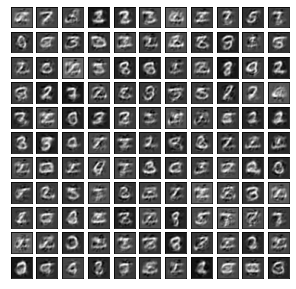

In [12]:
# sample z
z = torch.randn(batch_size, 8).to(device)

# sample x (i.e. imgs)
sample = AE.decoder(z)

plt.close()
grid_size, k = int(sample.shape[0] ** 0.5), 0 # 10 * 10
fig, ax = plt.subplots(grid_size, grid_size, figsize=(5, 5))
for i, j in product(range(grid_size), range(grid_size)): # to draw 10 * 10 images
    ax[i,j].get_xaxis().set_visible(False)
    ax[i,j].get_yaxis().set_visible(False)
    ax[i,j].imshow(sample[k].data.view(28,28).cpu().numpy(), cmap='gray')
    k += 1
plt.show()

## Ex2: Sample Interpolated Images
sample two random latent vectors from $p(z)$,
        then sample from their interpolated values

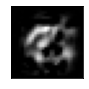

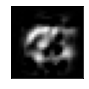

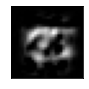

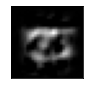

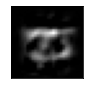

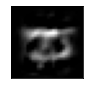

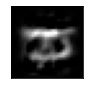

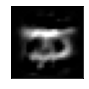

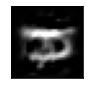

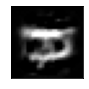

In [14]:
import numpy as np
# Sample 2 latent vectors 
z1 = torch.normal(torch.zeros(8), 1) # the first input is the tensor of Mean values
z2 = torch.normal(torch.zeros(8), 1)

# Interpolate within latent vectors

for alpha in np.linspace(0, 1, 10):
    z = (alpha * z1 + (1 - alpha) * z2).to(device)
    sample = AE.decoder(z)
    img = to_gray_img(sample)
    plt.close()
    fig = plt.figure(figsize=(1,1))
    ax = fig.add_axes([0,0,1,1])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.imshow(img.data.view(28,28).cpu().numpy(), cmap = 'gray')
    plt.show()

## Ex3: Explore the latent space
Sample four random latent vectors from $p(z)$, then sample two of them as the x-axis, the other as y-axis.

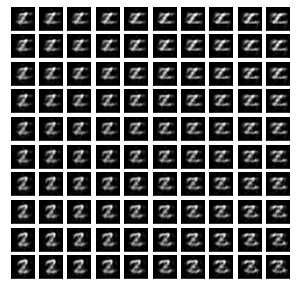

In [16]:
# Sample 2 latent vectors as X-axis 
z1 = torch.normal(torch.zeros(8), 1) # the first input is the tensor of Mean values
z2 = torch.normal(torch.zeros(8), 1)

# Sample 2 latent vectors as Y-axis 
z3 = torch.normal(torch.zeros(8), 1) # the first input is the tensor of Mean values
z4 = torch.normal(torch.zeros(8), 1)




i = 0
j = 0
plt.close()
fig, ax = plt.subplots(10, 10, figsize=(5, 5))

for alpha in np.linspace(0, 1, 10):
    j = 0
    for beta in np.linspace(0, 1, 10):
        z = ((alpha * z1 + (1 - alpha) * z2 + beta * z3 + (1 - beta) * z4)/2).to(device)
        sample = AE.decoder(z)
        img = to_gray_img(sample)
        ax[i,j].get_xaxis().set_visible(False)
        ax[i,j].get_yaxis().set_visible(False)
        ax[i,j].imshow(img.data.view(28,28).cpu().numpy(), cmap='gray')
        j += 1
    i += 1
    
plt.show()